<a href="https://colab.research.google.com/github/devdezzies/deep-learning-with-pytorch/blob/main/LayoutLMV2_clab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

torch.__version__

'2.3.1+cu121'

In [2]:
from transformers import LayoutLMv2FeatureExtractor
from transformers import LayoutLMv2Processor
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [3]:
!pip install tesseract

In [4]:
!pip install pytesseract

In [5]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [6]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


/usr/local/lib/python3.10/dist-packages/transformers/models/layoutlmv2/feature_extraction_layoutlmv2.py:30: FutureWarning: The class LayoutLMv2FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv2ImageProcessor instead.
  warnings.warn(


[['erm', 'Sal:', 'nabati', 'peach', '—', '|', 'x', '2000=', '2', 'PCS', 'oreo', 'vanilla', '38', '00,0', 'et', '2000=', 'tajimas', 'gold', 'grenjeng', '2', 'x', '80005', 'andalan', '12', '2', 'x', '140005', 'top', 'coffe', 'mini', '4500=', 'Total', '=', '54.500', ',00', 'Tunai', '=8,992.775.11.B08,', 'Kembali', '=8', '992.775.', '257', '.', '108,', 'felanja', 'Murah', 'Semoga', 'Berka', '«']]
torch.Size([1, 3, 224, 224])
[[[314, 1, 372, 14], [206, 1, 284, 47], [208, 95, 330, 119], [360, 100, 462, 121], [804, 107, 850, 112], [214, 131, 220, 155], [320, 139, 336, 155], [490, 134, 586, 160], [714, 146, 728, 163], [804, 104, 856, 145], [210, 175, 294, 194], [320, 167, 466, 194], [492, 170, 530, 194], [758, 155, 842, 181], [214, 208, 338, 250], [494, 206, 596, 233], [214, 250, 364, 280], [390, 245, 472, 278], [498, 251, 662, 278], [214, 289, 232, 319], [326, 296, 344, 317], [500, 286, 602, 316], [218, 329, 370, 361], [400, 329, 434, 356], [220, 371, 238, 400], [332, 377, 348, 397], [488, 36

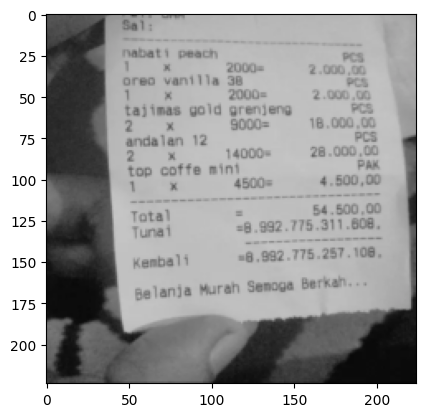

In [33]:
url = "https://cdn0-production-images-kly.akamaized.net/esJHUdOG4JuOQ00GHeB3-3nfJzs=/500x667/smart/filters:quality(75):strip_icc():format(webp)/kly-media-production/medias/4444061/original/024257300_1685252724-ghyjyuj.jpg"

image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased", revision="no_ocr")

# option 1: with apply_ocr=True (default)
feature_extractor = LayoutLMv2FeatureExtractor()
encoding = feature_extractor(image, return_tensors="pt")
print(encoding['words'])
# dict_keys(['pixel_values', 'words', 'boxes'])

# option 2: with apply_ocr=False
# feature_extractor = LayoutLMv2FeatureExtractor(apply_ocr=False)
# encoding = feature_extractor(image, return_tensors="pt")
print(encoding['pixel_values'].shape)
plt.imshow(encoding['pixel_values'].squeeze().permute(1, 2, 0))
print(encoding['boxes'])

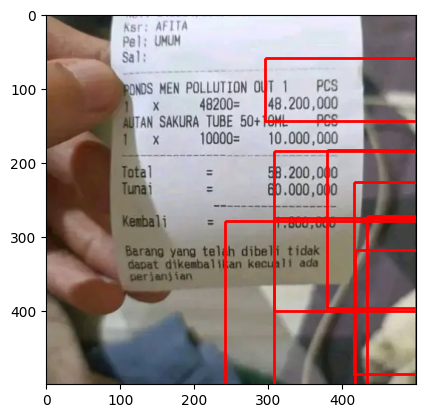

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1)
ax.imshow(image)

for bbox in encoding['boxes'][0]:
    x, y, width, height = bbox
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

In [1]:
from pathlib import Path

DIR_PATH = Path('saved/models')
DIR_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "LayoutLMV2.pt"
MODEL_PATH = DIR_PATH / MODEL_NAME

torch.save(feature_extractor, MODEL_PATH)

NameError: name 'torch' is not defined

# AutoTokenizer

In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForVision2Seq

tokenizer = AutoTokenizer.from_pretrained("nielsr/donut-demo")
model = AutoModelForVision2Seq.from_pretrained("nielsr/donut-demo") # Use AutoModelForVision2Seq to load a Donut model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [9]:
from transformers import DonutProcessor

url = "https://passingthroughresearcher.wordpress.com/wp-content/uploads/2019/06/img_20190511_084303.jpg"

image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = DonutProcessor.from_pretrained("nielsr/donut-demo")
pixel_values = processor(image, return_tensors="pt").pixel_values

outputs = model.generate(pixel_values, max_length=512)

sequence = processor.decode(outputs[0], skip_special_tokens=True)
print(sequence)


<s_cord-v2><s_menu><s_nm> RUKO SUMMAREON BEKASI</s_nm><s_price> BreadTalk</s_nm><s_price> RUKO SUMMAREON</s_price><sep/><s_nm> JL.BOULEVARD BARU SUMMARECON</s_nm><s_num> (021)</s_num><s_price> (021)</s_price><s_sub><s_nm> WWW.btdelivery.com</s_nm><s_cnt> 1</s_cnt><sep/><s_nm> POS</s_nm><s_num> 1506551 WINDA A PRIANI P</s_nm><s_cnt> 1</s_cnt><sep/><s_nm> Check No : 3059689</s_num><s_cnt> 1</s_cnt><s_price> 11,500</s_price><sep/><s_nm> Cream Bruille</s_nm><s_cnt> 1</s_cnt><s_price> 14,000</s_price><sep/><s_nm> Choco Croissant</s_nm><s_cnt> 1</s_cnt><s_price> 10,500</s_price><sep/><s_nm> Bank Of Chocolat</s_nm><s_cnt> 1</s_cnt><s_price> 7,500</s_price></s_sub></s_menu><s_sub_total><s_subtotal_price> 43,500</s_subtotal_price></s_sub_total><s_total><s_total_price> 43,500</s_total_price><s_creditcardprice> 43,500</s_creditcardprice><s_menuqty_cnt> 10 May 19 16:33:20 -</s_menuqty_cnt></s_total>


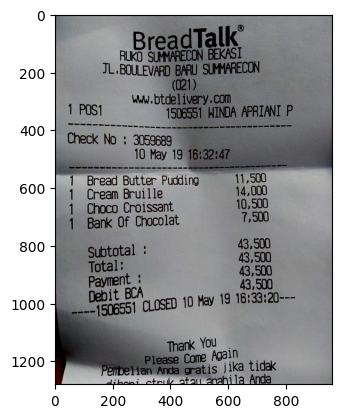

In [10]:
img = processor(image, return_tensors="pt")['pixel_values']

plt.imshow(img.squeeze().permute(1, 2, 0))

In [11]:
import re
import json

# text = "<s_cord-v2><s_menu><s_nm> RB. COKLAT BAR</s_nm><s_cnt> 1</s_cnt><s_price> 8,000</s_price><sep/><s_nm> RB. CREPES TUNA</s_nm><s_cnt> 1</s_cnt><s_price> 9,000</s_price><sep/><s_nm> RB. SISIR PANDAN</s_nm><s_cnt> 1</s_cnt><s_price> 7,500</s_price></s_menu><s_sub_total><s_subtotal_price> 24,500</s_subtotal_price></s_sub_total><s_total><s_total_price> 24,500</s_total_price><s_cas"

# Extract items
items = re.findall(r'<s_nm>(.*?)</s_nm><s_cnt>(.*?)</s_cnt><s_price>(.*?)</s_price>', sequence)

# Extract subtotals and totals
subtotals = re.findall(r'<s_subtotal_price>(.*?)</s_subtotal_price>', sequence)
totals = re.findall(r'<s_total_price>(.*?)</s_total_price>', sequence)

# Create result dictionary
result = {
    "menu": [
        {"s_nm": item[0].strip(), "s_cnt": item[1].strip(), "s_price": item[2].strip()}
        for item in items
    ],
    "sub_total": subtotals[0].strip() if subtotals else None,
    "total": totals[0].strip() if totals else None
}

# Convert to JSON
json_output = json.dumps(result, indent=2)
print(json_output)#

{
  "menu": [
    {
      "s_nm": "RUKO SUMMAREON BEKASI</s_nm><s_price> BreadTalk</s_nm><s_price> RUKO SUMMAREON</s_price><sep/><s_nm> JL.BOULEVARD BARU SUMMARECON</s_nm><s_num> (021)</s_num><s_price> (021)</s_price><s_sub><s_nm> WWW.btdelivery.com",
      "s_cnt": "1</s_cnt><sep/><s_nm> POS</s_nm><s_num> 1506551 WINDA A PRIANI P</s_nm><s_cnt> 1</s_cnt><sep/><s_nm> Check No : 3059689</s_num><s_cnt> 1",
      "s_price": "11,500"
    },
    {
      "s_nm": "Cream Bruille",
      "s_cnt": "1",
      "s_price": "14,000"
    },
    {
      "s_nm": "Choco Croissant",
      "s_cnt": "1",
      "s_price": "10,500"
    },
    {
      "s_nm": "Bank Of Chocolat",
      "s_cnt": "1",
      "s_price": "7,500"
    }
  ],
  "sub_total": "43,500",
  "total": "43,500"
}
